# Analise Exploratoria

In [2]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn import model_selection
from sklearn import ensemble
from category_encoders import target_encoder
import optuna
from optuna.integration import OptunaSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from category_encoders import TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn import metrics
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer

c:\dtf\CSs\DS_Academy\projetos\aplicacao_web_integracao_c_ml_-disc_1_eng_ml\appwebml\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [54]:
base = pd.read_csv(r'C:\dtf\CSs\DS_Academy\projetos\aplicacao_web_integracao_c_ml_-disc_1_eng_ml\app_web_ml\base.csv')
base.head(20)

,Gender,Age,YearsCodePro,Country,Salary,EdLevel
0,Man,36.0,13,United States,116000.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
1,Man,22.0,4,United Kingdom,32315.0,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)"
2,Man,23.0,2,United Kingdom,40070.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
3,Man,49.0,7,Spain,14268.0,Some college/university study without earning ...
4,Man,53.0,20,Netherlands,38916.0,"Secondary school (e.g. American high school, G..."
5,Man,27.0,1,United States,66000.0,"Associate degree (A.A., A.S., etc.)"
6,Man,45.0,23,United Kingdom,108576.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
7,Man,25.0,3,United States,79000.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
8,Man,32.0,12,United States,1260000.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
9,Man,24.0,3,United States,83400.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)"


In [4]:
base.shape


(34756, 6)

In [5]:
base.isnull().sum()          

Gender          2629
Age             4160
YearsCodePro     135
Country            0
Salary             0
EdLevel          568
dtype: int64

In [6]:
base.dtypes

Gender              str
Age             float64
YearsCodePro        str
Country             str
Salary          float64
EdLevel             str
dtype: object

In [7]:

base['YearsCodePro'] = base['YearsCodePro'].replace({'More than 50 years':'50', 
                                                     'Less than 1 year':'1'}).astype(float)


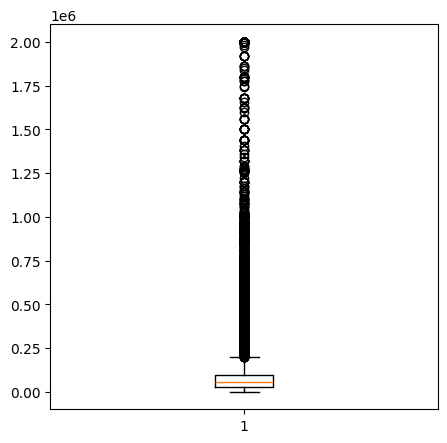

In [8]:
plt.figure(figsize=(5,5))
plt.boxplot(base['Salary'])
plt.show()

In [ ]:
base = base[base['Salary']<=250000]


In [9]:
#Country_values = base['Country'].value_counts()
#DevType_values = base['DevType'].value_counts()
#Country_values = base['Country'].value_counts()
Gender_values = base['Gender'].value_counts()
Gender_values

Gender
Man                                                            29437
Woman                                                           2274
Non-binary, genderqueer, or gender non-conforming                244
Man;Non-binary, genderqueer, or gender non-conforming             80
Woman;Non-binary, genderqueer, or gender non-conforming           55
Woman;Man                                                         27
Woman;Man;Non-binary, genderqueer, or gender non-conforming       10
Name: count, dtype: int64

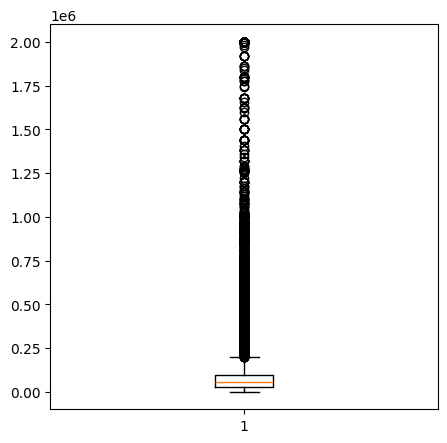

In [10]:
plt.figure(figsize=(5,5))
plt.boxplot(base['Salary'])
plt.show()

In [11]:
# padronizando os dados no formato que o usuario poderar selecionar no site, assim o modelo ja recebera os dados padronizados
edlevel_map = {
    "I never completed any formal education": "No formal education",
    "Primary/elementary school": "Primary/elementary school",
    "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)": "Secondary school (if completed)",
    "Some college/university study without earning a degree": "Some college/university study without earning a degree",
    "Associate degree (A.A., A.S., etc.)": "Associate degree / technical diploma",
    "Bachelor’s degree (B.A., B.S., B.Eng., etc.)": "Bachelor’s degree",
    "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)": "Master’s degree",
    "Professional degree (JD, MD, etc.)": "Professional degree (e.g., JD, MD)",
    "Other doctoral degree (Ph.D., Ed.D., etc.)": "PhD or other doctoral degree"
}

base['EdLevel'] = base['EdLevel'].str.strip().str.replace("’", "'", regex=False)

base['EdLevel'] = base['EdLevel'].replace(edlevel_map)

base['EdLevel'].unique()


<StringArray>
[          'Bachelor's degree (B.A., B.S., B.Eng., etc.)',
        'Master's degree (M.A., M.S., M.Eng., MBA, etc.)',
 'Some college/university study without earning a degree',
                        'Secondary school (if completed)',
                   'Associate degree / technical diploma',
                     'Professional degree (e.g., JD, MD)',
                           'PhD or other doctoral degree',
                                                      nan,
                              'Primary/elementary school',
                                    'No formal education']
Length: 10, dtype: str

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

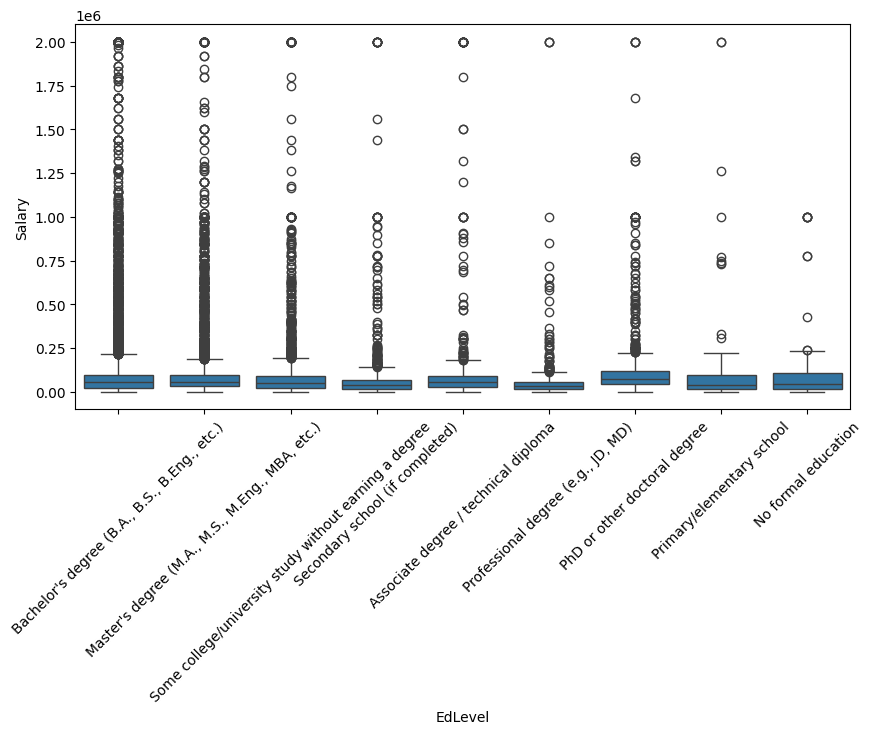

In [12]:
plt.figure(figsize=(10,5))
sns.boxplot(x='EdLevel', y='Salary', data=base)
plt.xticks(rotation=45)
plt.plot

In [13]:
# padronizando os dados no formato que o usuario poderar selecionar no site, assim o modelo ja recebera os dados padronizados
gender_map = {                                                        'Man':'Man',                                                           
                                                       'Woman':'Woman',
       'Man;Non-binary, genderqueer, or gender non-conforming':'Non-binary, genderqueer, or gender non-conforming',
           'Non-binary, genderqueer, or gender non-conforming':'Non-binary, genderqueer, or gender non-conforming',
     'Woman;Non-binary, genderqueer, or gender non-conforming':'Non-binary, genderqueer, or gender non-conforming',
 'Woman;Man;Non-binary, genderqueer, or gender non-conforming':'Non-binary, genderqueer, or gender non-conforming',
                                                   'Woman;Man':'Non-binary, genderqueer, or gender non-conforming'}

base['Gender'] = base['Gender'].replace(gender_map)
base['Gender'].value_counts()


Gender
Man                                                  29437
Woman                                                 2274
Non-binary, genderqueer, or gender non-conforming      416
Name: count, dtype: int64

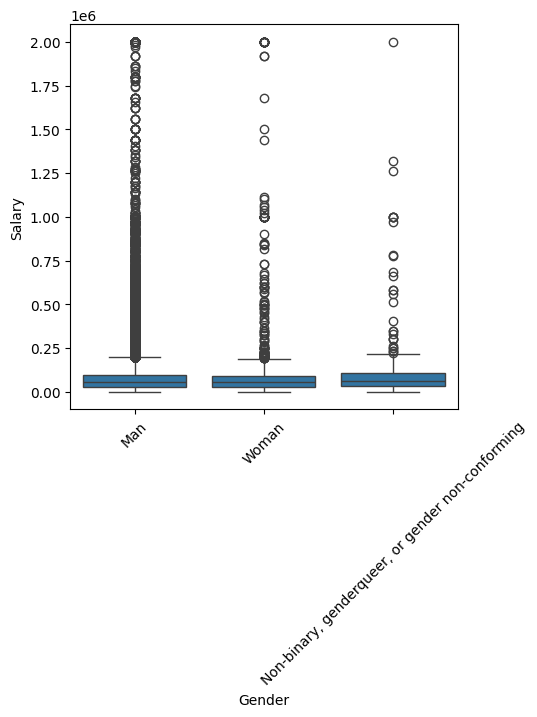

In [14]:
plt.figure(figsize=(5,5))
sns.boxplot(x='Gender', y='Salary', data=base)
plt.xticks(rotation=45)
plt.show()

In [15]:
base['Country'].value_counts()

Country
United States                       8152
India                               2668
United Kingdom                      2588
Germany                             2311
Canada                              1345
                                    ... 
Monaco                                 1
Saint Vincent and the Grenadines       1
Niger                                  1
Belize                                 1
Yemen                                  1
Name: count, Length: 159, dtype: int64

In [57]:
# agrupando categorias raras
counts = base['Country'].value_counts()

base['Country'] = base['Country'].where(
    base['Country'].isin(counts[counts >= 100].index),
    'Other')

base['Country'].value_counts().tail()

Country
Singapore    105
Viet Nam     103
Slovakia     102
Estonia      101
China        100
Name: count, dtype: int64

In [17]:
counts = base['Country'].value_counts()
counts[counts >= 100].index

Index(['United States', 'India', 'United Kingdom', 'Germany', 'Other',
       'Canada', 'Brazil', 'France', 'Netherlands', 'Poland', 'Australia',
       'Spain', 'Italy', 'Russian Federation', 'Sweden', 'Turkey',
       'Switzerland', 'Israel', 'Pakistan', 'Romania', 'Mexico',
       'Czech Republic', 'Austria', 'Ukraine', 'South Africa', 'Ireland',
       'Iran', 'Norway', 'Belgium', 'Denmark', 'Portugal', 'Argentina',
       'Hungary', 'Finland', 'New Zealand', 'Greece', 'Bangladesh', 'Japan',
       'Bulgaria', 'Nigeria', 'Colombia', 'Serbia', 'Indonesia', 'Philippines',
       'Lithuania', 'Singapore', 'Croatia', 'Sri Lanka', 'Slovakia', 'Chile',
       'Viet Nam', 'China', 'Estonia', 'Malaysia'],
      dtype='str', name='Country')

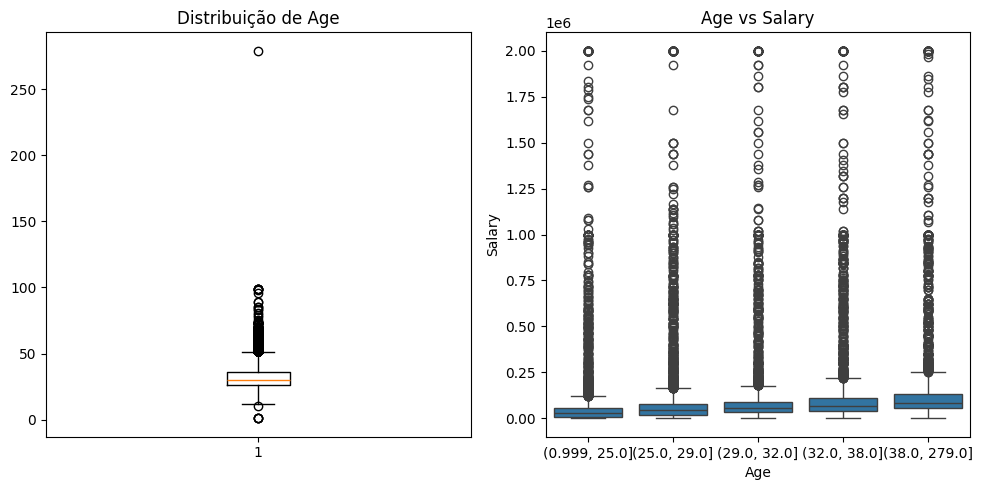

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].boxplot(base['Age'].dropna())
axes[0].set_title('Distribuição de Age')

sns.boxplot(
    x=pd.qcut( # setando bins para vizualizacao eficaz em faixas de idade
    base['Age'],
    q=5,   # 5 faixas
    duplicates='drop'),
    y='Salary',
    data=base,
    ax=axes[1])

axes[1].set_title('Age vs Salary')

plt.tight_layout()
plt.show()

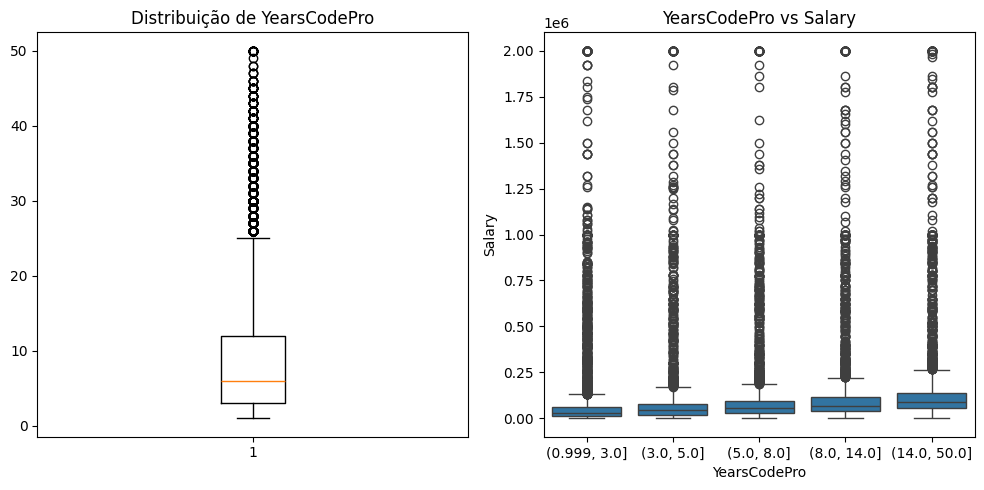

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].boxplot(base['YearsCodePro'].dropna())
axes[0].set_title('Distribuição de YearsCodePro')


sns.boxplot(
    x=pd.qcut( # setando bins para vizualizacao eficaz em faixas de idade
    base['YearsCodePro'],
    q=5,   # 5 faixas
    duplicates='drop'),
    y='Salary',
    data=base,
    ax=axes[1])

axes[1].set_title('YearsCodePro vs Salary')

plt.tight_layout()
plt.show()

In [20]:
base.dtypes

Gender              str
Age             float64
YearsCodePro    float64
Country             str
Salary          float64
EdLevel             str
dtype: object

 # Criaçao de modelo para servir de baseline:

In [ ]:
# modelo baseline
x = base.drop(columns='Salary')
y = base['Salary']   

xtrain, xtest, ytrain, ytest = model_selection.train_test_split(x, y, test_size=0.3, random_state=42) 


# para tratar outliers da target pois podem prejudicar o aprendizado do ml()
yeo_t = PowerTransformer(method='yeo-johnson')
ytrain_t = yeo_t.fit_transform(ytrain.to_frame())

# o random forest é mais sensivel a target com outliers, por isso somente target foi tratado
# tratar features pode ser aplicado no futoro pra ver se melhora a precisao 

In [59]:
x_cat = x.dtypes.index[x.dtypes=='str'].tolist()
x_num = x.dtypes.index[x.dtypes=='float64'].tolist()

In [60]:
pipe_cat = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                           ('mean_encoder', TargetEncoder(smoothing=20))])

pipe_num = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean'))])


transform = ColumnTransformer([('cat_transform', pipe_cat, x_cat), 
                               ('num_transform', pipe_num, x_num)])

modelo = ensemble.RandomForestRegressor(random_state=42)

pipe_model = Pipeline(steps=[('transformer', transform), ('model', modelo)])


In [ ]:
pipe_model.fit(xtrain, ytrain_t.ravel())

ytrain_predict = yeo_t.inverse_transform(pipe_model.predict(xtrain).reshape(-1, 1))
ytest_predict = yeo_t.inverse_transform(pipe_model.predict(xtest).reshape(-1, 1)) 

baseline_report = {
'rmse_train': metrics.root_mean_squared_error(ytrain, ytrain_predict),
'rmse_test': metrics.root_mean_squared_error(ytest, ytest_predict),
'r2': metrics.r2_score(ytest, ytest_predict)
}


c:\dtf\CSs\DS_Academy\projetos\aplicacao_web_integracao_c_ml_-disc_1_eng_ml\appwebml\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
c:\dtf\CSs\DS_Academy\projetos\aplicacao_web_integracao_c_ml_-disc_1_eng_ml\appwebml\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


In [ ]:
baseline_report

{'rmse_train': 20808.859225914348,
 'rmse_test': 33928.954688672806,
 'r2': 0.5236648259262251}